In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
sys.path.append(os.path.abspath(os.path.join('../models/')))

In [78]:
import pickle
with open('dict_data_final.pkl', 'rb') as f:
    dict_data_final = pickle.load(f)

In [79]:
x, y = dict_data_final['Beneixama']

# 1. DATAFRAMES

In [72]:
path = './baseline/'
os.listdir(path=path)
df0 = pd.read_csv(path + os.listdir(path=path)[0], index_col=0)
df1 = pd.read_csv(path + os.listdir(path=path)[1], index_col=0)
df2 = pd.read_csv(path + os.listdir(path=path)[2], index_col=0)
df3 = pd.read_csv(path + os.listdir(path=path)[3], index_col=0)
df4 = pd.read_csv(path + os.listdir(path=path)[4], index_col=0)
df5 = pd.read_csv(path + os.listdir(path=path)[5], index_col=0)
df6 = pd.read_csv(path + os.listdir(path=path)[6], index_col=0)
df7 = pd.read_csv(path + os.listdir(path=path)[7], index_col=0)
df8 = pd.read_csv(path + os.listdir(path=path)[8], index_col=0)

In [74]:
df0.loc['Beneixama'], df1.loc['Beneixama'], df2.loc['Beneixama']

(Accuracy            0.982740
 CrossEntropy        0.573038
 Fired            1476.000000
 ModelFired       1297.000000
 ExpectedFired    1444.009888
 Name: Beneixama, dtype: float64,
 Accuracy            0.983709
 CrossEntropy        0.571485
 Fired            1476.000000
 ModelFired       1348.000000
 ExpectedFired    1391.639893
 Name: Beneixama, dtype: float64,
 Accuracy            0.984693
 CrossEntropy        0.569423
 Fired            1476.000000
 ModelFired       1082.000000
 ExpectedFired    1126.179932
 Name: Beneixama, dtype: float64)

In [76]:
from baseline import *

In [80]:
P = [0, 0.1, 0.5, 0.9, 1]

In [81]:
grid = Grid(x=x, y=y)
grid.initialize(part=P, div=1.5)
grid.submatrix()
grid.enlargement_process()
grid.montecarlo(n_it=100)

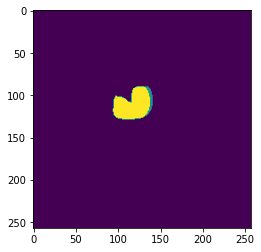

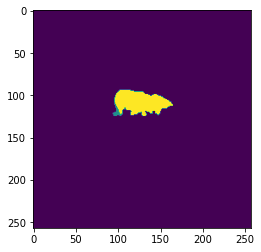

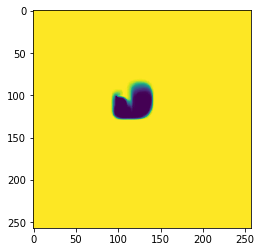

In [85]:
plt.imshow(grid.X[:, :, -1].numpy())
plt.show()
plt.imshow(y[:, :, -1])
plt.show()
plt.imshow(grid.X0[:, :, -1].numpy())
plt.show()

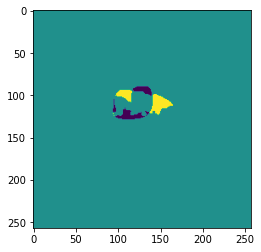

In [88]:
X = (grid.X[:, :, -1].numpy() == 0)*1
Y = (y[:, :, -1] == 0)*1

plt.imshow(X-Y)

In [144]:
P1 = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
grid = Grid(x=x, y=y)
grid.initialize(part=P1, div=2)
grid.submatrix()
grid.enlargement_process()
grid.montecarlo(n_it=100)

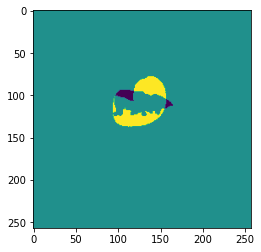

In [145]:
X = (grid.X[:, :, -1].numpy() != 0)*1
Y = (y[:, :, -1] != 0)*1

plt.imshow(X-Y)

In [ ]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix of X e Y

cmat = confusion_matrix(Y.flatten(), X.flatten(), normalize='true')
total = np.sum(cmat)
sns.heatmap(cmat, annot=True, cmap='Blues', fmt='g')
plt.show()

In [148]:
cmat0 = confusion_matrix(Y.flatten(), X.flatten())
total0 = np.sum(cmat0)

acc = (cmat0[0, 0] + cmat0[1, 1])/total0*100
prec = cmat0[0, 0]/(cmat0[0, 0] + cmat0[0, 1])*100
rec = cmat0[0, 0]/(cmat0[0, 0] + cmat0[1, 0])*100
f1 = 2*prec*rec/(prec + rec)*100

acc, prec, rec, f1

(0.9751396690335963,
 0.9784275161445186,
 0.9960743508489808,
 0.9871720754363214)

# 2. THMODELS

In [150]:
from thmodel import *

In [172]:
P1 = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
grid = Grid(x=x, y=y)
grid.initialize(part=P1)
grid.compute_th_param(alpha=1., beta=1., gamma=1.2)
grid.submatrix()
grid.enlargement_process()
grid.montecarlo(n_it=100)

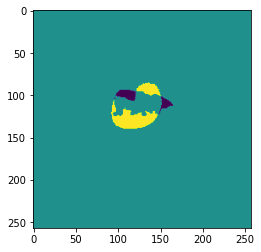

In [173]:
X = (grid.X[:, :, -1].numpy() != 0)*1
Y = (y[:, :, -1] != 0)*1

plt.imshow(X-Y)

In [174]:
cmat0 = confusion_matrix(Y.flatten(), X.flatten())
total0 = np.sum(cmat0)

acc = (cmat0[0, 0] + cmat0[1, 1])/total0*100
prec = cmat0[0, 0]/(cmat0[0, 0] + cmat0[0, 1])*100
rec = cmat0[0, 0]/(cmat0[0, 0] + cmat0[1, 0])*100
f1 = 2*prec*rec/(prec + rec)

acc, prec, rec, f1

(97.73804296809944, 98.22836169916219, 99.45123002869283, 98.83601346297681)

In [175]:
grid.div.median(), grid.div.mean(), grid.div.std()

(tensor(1.9564), tensor(2.3159), tensor(0.7625))

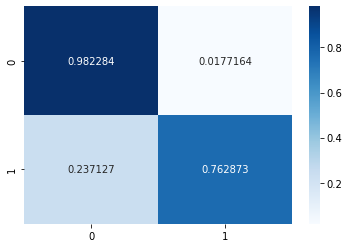

In [176]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix of X e Y

cmat = confusion_matrix(Y.flatten(), X.flatten(), normalize='true')
total = np.sum(cmat)
sns.heatmap(cmat, annot=True, cmap='Blues', fmt='g')
plt.show()